<h1><center>CSCI 6515 - Machine Learning for Big Data (Fall 2023)</h1></center>
<h1><center>Assignment 1</h1></center>

<b>Siqi Wang</b>  
<b>Banner ID: B00976996</b>  


### 1. Task 1<a id='top'></a>

Your first task is to conduct research to identify appropriate resources for obtaining such data and to understand their format.

In [58]:
import pandas as pd
import numpy as np

In [59]:
PM_data=pd.read_csv('Nova_Scotia_Provincial_Ambient_Fine_Particulate_Matter__PM2.5__Hourly_Data_Halifax_BAM_T640.csv')
PM_data

,Date & time,Pollutant,Unit,Station,Instrument,Average
0,2006/01/01 01:00:00 AM,PM2.5,µg/m3,Halifax,BAM 1020,NaN
1,2006/01/01 02:00:00 AM,PM2.5,µg/m3,Halifax,BAM 1020,NaN
2,2006/01/01 03:00:00 AM,PM2.5,µg/m3,Halifax,BAM 1020,NaN
3,2006/01/01 04:00:00 AM,PM2.5,µg/m3,Halifax,BAM 1020,NaN
4,2006/01/01 05:00:00 AM,PM2.5,µg/m3,Halifax,BAM 1020,NaN
...,...,...,...,...,...,...
140250,2021/12/31 07:00:00 PM,PM2.5,µg/m3,Halifax Johnston,API T640,4.2
140251,2021/12/31 08:00:00 PM,PM2.5,µg/m3,Halifax Johnston,API T640,5.0
140252,2021/12/31 09:00:00 PM,PM2.5,µg/m3,Halifax Johnston,API T640,5.3
140253,2021/12/31 10:00:00 PM,PM2.5,µg/m3,Halifax Johnston,API T640,5.1


In [60]:
Traffic_data=pd.read_csv('Traffic_Volumes_-_Provincial_Highway_System.csv')
Traffic_data.head()

,SECTION ID,HIGHWAY,SECTION,SECTION LENGTH,SECTION DESCRIPTION,Date,DESCRIPTION,GROUP,TYPE,COUNTY,PTRUCKS,ADT,AADT,DIRECTION,85PCT,PRIORITY_POINTS
0,1047,1,47,4.5,PATTON RD (SACKVILLE) TO MOUNT UNIACKE CONN,06/20/2022,0.5 KM EAST OF BRUSHY HILL RD,A,TC,HFX,NaN,2986.0,2760.0,NaN,NaN,NaN
1,1047,1,47,4.5,PATTON RD (SACKVILLE) TO MOUNT UNIACKE CONN,05/27/2021,JUST WEST OF PATTON RD (EB),A,VC,HFX,4.0,1396.0,1310.0,E,NaN,NaN
2,1047,1,47,4.5,PATTON RD (SACKVILLE) TO MOUNT UNIACKE CONN,05/27/2021,JUST WEST OF PATTON RD (WB),A,VC,HFX,4.0,1774.0,1350.0,W,NaN,NaN
3,1047,1,47,4.5,PATTON RD (SACKVILLE) TO MOUNT UNIACKE CONN,05/27/2021,0.5 KM EAST OF BRUSHY HILL RD,A,TC,HFX,NaN,2733.0,2550.0,NaN,NaN,NaN
4,1047,1,47,4.5,PATTON RD (SACKVILLE) TO MOUNT UNIACKE CONN,11/24/2020,0.5 KM EAST OF BRUSHY HILL RD,A,TC,HFX,NaN,2350.0,2460.0,NaN,NaN,NaN


### 1. Task 2<a id='top'></a>

You will preprocess the PM2.5 data (recommended year: 2019) and the traffic data (in CSV format).

#### i) Subtask 2.i
The traffic data needs to be filtered to represent the Halifax region.

In [61]:
Traffic_data=Traffic_data[Traffic_data['COUNTY']=='HFX']
Traffic_data.shape

(2325, 16)

#### ii) Subtask 2.ii
The PM2.5 data will serve as labels for the traffic dataset, so you should compute the daily averages.

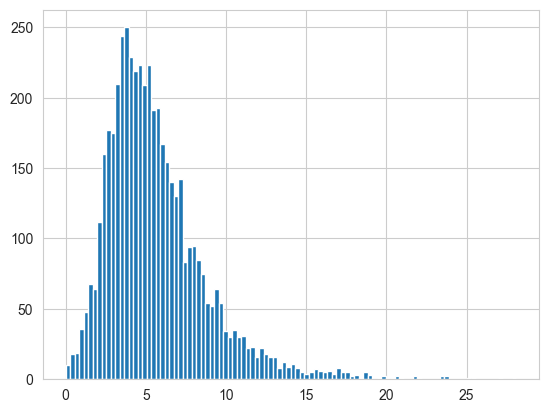

In [62]:
PM_data['Date & Time']=pd.to_datetime(PM_data['Date & time'])
PM_data['Date']=PM_data['Date & Time'].dt.date
PM_data=PM_data.groupby('Date')['Average'].mean()
PM_data=PM_data.reset_index()
PM_data=PM_data.dropna()
PM_data.head()
import matplotlib.pyplot as plt
plt.hist(PM_data['Average'],bins=100)
plt.show()

#### iii) Subtask 2.iii
Subsequently, you must normalize the PM2.5 levels and discretize them using a threshold of 0.5. During this step, perform a descriptive analysis of your data to gain a better understanding of it. This process will result in a dataset that you can work with.

In [63]:
#merge the two dataframes 
Traffic_data=Traffic_data[['Date','ADT','AADT']]
Traffic_data=Traffic_data.dropna()
Traffic_data=Traffic_data.groupby('Date').mean()
Traffic_data.reset_index(inplace=True)
Traffic_data['Date']=pd.to_datetime(Traffic_data['Date'])
print(Traffic_data)
PM_data['Date']=pd.to_datetime(PM_data['Date'])
print(PM_data.shape)
test_data=pd.merge(PM_data,Traffic_data,on='Date')
test_data.shape

          Date      ADT     AADT
0   2006-01-01   6888.0   9640.0
1   2007-01-01   7123.0   9830.0
2   2008-01-01   7123.0   9830.0
3   2017-01-01      0.0  11200.0
4   2018-01-01      0.0  11600.0
..         ...      ...      ...
456 2017-12-11   6333.5   6580.0
457 2019-12-12  30750.0  32100.0
458 2019-12-18  27644.0  28495.0
459 2012-12-19  24632.0  25600.0
460 2015-12-25  29630.0  30000.0

[461 rows x 3 columns]
(4901, 2)


(359, 4)

In [64]:
#normalize the data
test_data['Average']=(test_data['Average']-test_data['Average'].min())/(test_data['Average'].max()-test_data['Average'].min())
test_data['ADT']=(test_data['ADT']-test_data['ADT'].min())/(test_data['ADT'].max()-test_data['ADT'].min())
test_data['AADT']=(test_data['AADT']-test_data['AADT'].min())/(test_data['AADT'].max()-test_data['AADT'].min())

In [65]:
#discretize them using a threshold of 0.5
test_data['Average']=test_data['Average'].apply(lambda x: 1 if x>0.5 else 0)
test_data

,Date,Average,ADT,AADT
0,2006-06-01,1,0.168829,0.155140
1,2006-07-11,1,0.297685,0.267722
2,2007-06-19,0,0.222768,0.211565
3,2007-06-20,0,0.023848,0.019361
4,2007-06-27,1,0.020305,0.015048
...,...,...,...,...
354,2021-11-01,0,0.763630,0.797008
355,2021-11-04,0,0.025239,0.024933
356,2021-11-17,0,0.250030,0.247690
357,2021-11-22,1,0.268254,0.264902


In [66]:
#descrptive statistics
test_data.describe()

,Date,Average,ADT,AADT
count,359,359.000000,359.000000,359.000000
mean,2015-08-12 23:07:51.309192192,0.077994,0.220506,0.218820
min,2006-06-01 00:00:00,0.000000,0.000000,0.000000
25%,2012-11-06 12:00:00,0.000000,0.060855,0.057020
50%,2016-06-30 00:00:00,0.000000,0.180629,0.179402
75%,2019-05-19 12:00:00,0.000000,0.307257,0.307181
max,2021-11-25 00:00:00,1.000000,1.000000,1.000000
std,NaN,0.268537,0.193793,0.195350


#### iv) Subtask 2.iv
Lastly, you should include one summary visualization of the data.

/var/folders/qm/9g2hk89d5z9dr27247qqdw0h0000gn/T/ipykernel_948/2674544729.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_data['Average'],bins=30,color='darkred',kde=False)


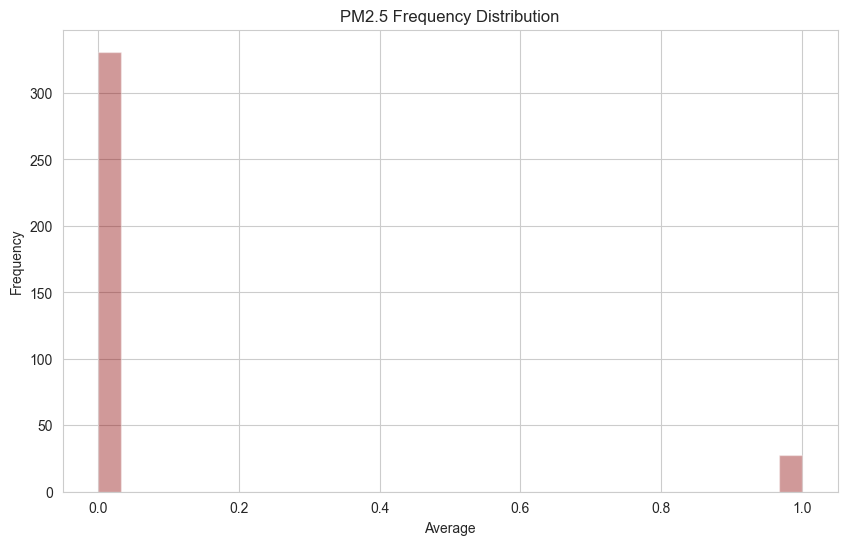

In [67]:
#plot the distribution of the PM2.5 values
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.distplot(test_data['Average'],bins=30,color='darkred',kde=False)
plt.xlabel('Average')
plt.ylabel('Frequency')
plt.title('PM2.5 Frequency Distribution')
plt.show()

/var/folders/qm/9g2hk89d5z9dr27247qqdw0h0000gn/T/ipykernel_948/2135484063.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_data['ADT'],bins=30,color='darkred',kde=False)


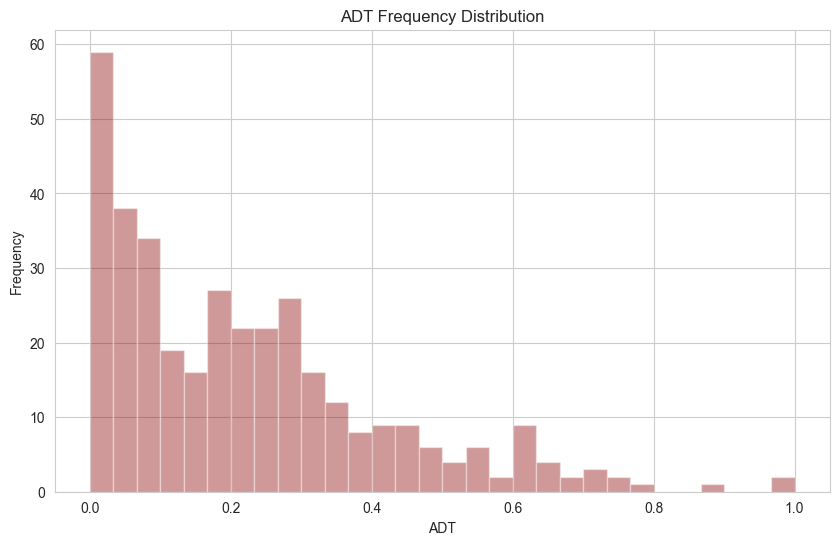

In [68]:
#plot the distribution of the ADT values
plt.figure(figsize=(10,6))
sns.distplot(test_data['ADT'],bins=30,color='darkred',kde=False)
plt.xlabel('ADT')
plt.ylabel('Frequency')
plt.title('ADT Frequency Distribution')
plt.show()

/var/folders/qm/9g2hk89d5z9dr27247qqdw0h0000gn/T/ipykernel_948/569392039.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_data['AADT'],bins=30,color='darkred',kde=False)


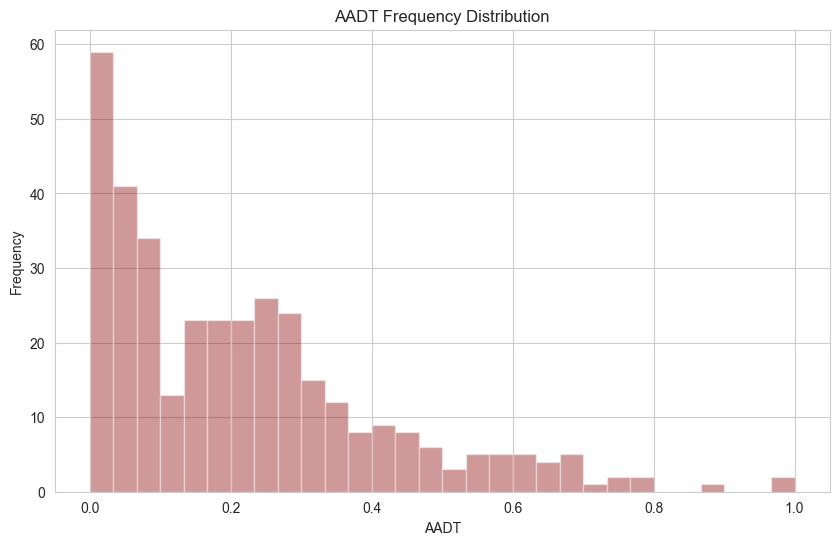

In [69]:
#plot the distribution of the AADT values
plt.figure(figsize=(10,6))
sns.distplot(test_data['AADT'],bins=30,color='darkred',kde=False)
plt.xlabel('AADT')
plt.ylabel('Frequency')
plt.title('AADT Frequency Distribution')
plt.show()

/var/folders/qm/9g2hk89d5z9dr27247qqdw0h0000gn/T/ipykernel_948/1582494532.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_data['Average'],bins=30,color='darkred',kde=False)


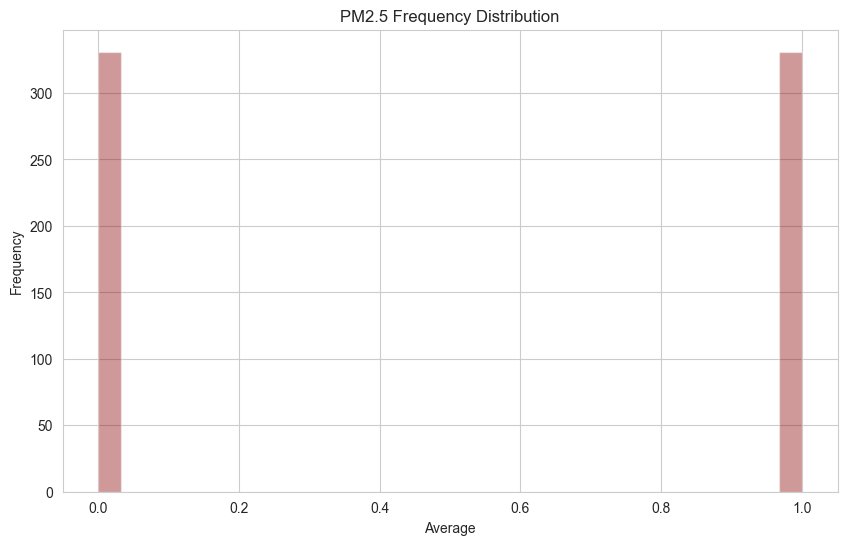

In [70]:
#resaample the data using SMOTE, so that the data is balanced
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(test_data[['ADT','AADT']], test_data['Average'])
X_res=pd.DataFrame(X_res)
X_res.columns=['ADT','AADT']
y_res=pd.DataFrame(y_res)
y_res.columns=['Average']
X_res['Average']=y_res['Average']
test_data=X_res
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.distplot(test_data['Average'],bins=30,color='darkred',kde=False)
plt.xlabel('Average')
plt.ylabel('Frequency')
plt.title('PM2.5 Frequency Distribution')
plt.show()


/var/folders/qm/9g2hk89d5z9dr27247qqdw0h0000gn/T/ipykernel_948/569392039.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_data['AADT'],bins=30,color='darkred',kde=False)


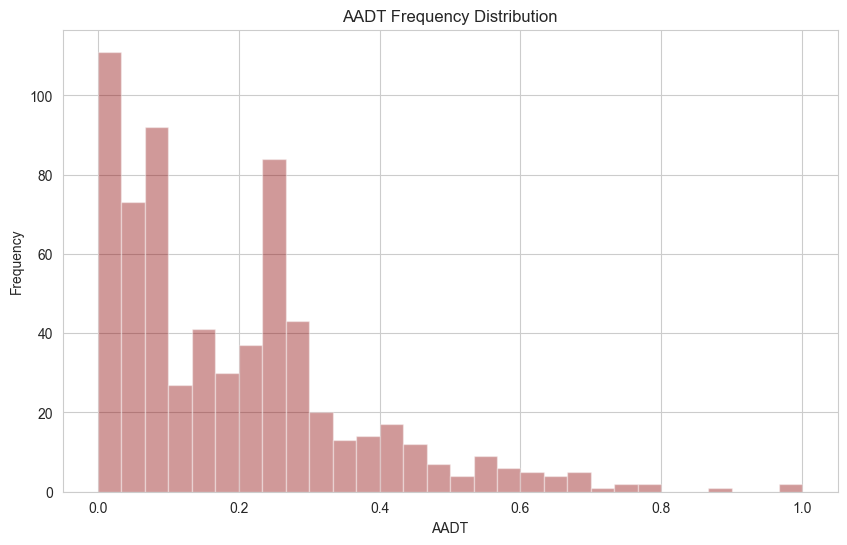

In [71]:
#plot the distribution of the AADT values
plt.figure(figsize=(10,6))
sns.distplot(test_data['AADT'],bins=30,color='darkred',kde=False)
plt.xlabel('AADT')
plt.ylabel('Frequency')
plt.title('AADT Frequency Distribution')
plt.show()

### 3. Task 3

#### i) Subtask 3.i
Use the Information Gain (IG) as the decision criterion to select which attribute to split on. Show your calculations for the IG for the root node.

test_data.sort_values(by='ADT',inplace=True)
#discretize the ADT values using its median
test_data['ADT']=test_data['ADT'].apply(lambda x: 1 if x>np.mean(test_data['ADT']) else 0)
test_data['AADT']=test_data['AADT'].apply(lambda x: 1 if x>np.mean(test_data['AADT']) else 0)
print(test_data['Average'].value_counts())
print(test_data['ADT'].value_counts())
print(test_data['AADT'].value_counts())
print(test_data[test_data['ADT']==1]['Average'].value_counts())
print(test_data[test_data['ADT']==0]['Average'].value_counts())
print(test_data[test_data['AADT']==1]['Average'].value_counts())
print(test_data[test_data['AADT']==0]['Average'].value_counts())
Average
0    331
1    331
Name: count, dtype: int64
ADT
0    373
1    289
Name: count, dtype: int64
AADT
0    370
1    292
Name: count, dtype: int64
Average
0    156
1    133
Name: count, dtype: int64
Average
1    198
0    175
Name: count, dtype: int64
Average
0    157
1    135
Name: count, dtype: int64
Average
1    196
0    174
Name: count, dtype: int64

#### ii) Subtask 3.ii
Repeat (i) using Gini Index criterion.

#### iii) Subtask 3.iii

##### a) Subtask 3.a
Create a decision tree using IG with default parameters

In [72]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
X=test_data[['ADT','AADT']]
y=test_data['Average']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
clf=DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7135678391959799
[[68 27]
 [30 74]]
              precision    recall  f1-score   support

           0       0.69      0.72      0.70        95
           1       0.73      0.71      0.72       104

    accuracy                           0.71       199
   macro avg       0.71      0.71      0.71       199
weighted avg       0.71      0.71      0.71       199



##### b) Subtask 3.b
Create a decision tree using Gini index with default parameters

In [73]:
X=test_data[['ADT','AADT']]
y=test_data['Average']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
clf=DecisionTreeClassifier(criterion='gini')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6934673366834171
[[67 28]
 [33 71]]
              precision    recall  f1-score   support

           0       0.67      0.71      0.69        95
           1       0.72      0.68      0.70       104

    accuracy                           0.69       199
   macro avg       0.69      0.69      0.69       199
weighted avg       0.69      0.69      0.69       199



##### c) Subtask 3.c
Explain which splitting criterion works well for your data and model and why. Create confusion matrix and obtain accuracy, precision, recall, specificity, and f-measure.

Answer: For my data, Gini is better than IG because it has a higher accuracy, precision, recall, specificity, and f-measure. This may be because Gini can better handle continuous data.

##### d) Subtask 3.d
Find optimal max_depth, min_values_split, or min_values_leaf for your model with 5-fold cross validation.

In [74]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
#use 5-fold cross validation
kf=KFold(n_splits=5,shuffle=True,random_state=0)
#use grid search to find the Find optimal max_depth, min_values_split, or min_values_leaf
parameters={'criterion':["gini", "entropy"],'max_depth':range(1,10),'min_samples_split':range(2,10),'min_samples_leaf':range(1,10)}
scorer=make_scorer(f1_score)
clf=DecisionTreeClassifier()
grid_obj=GridSearchCV(clf,parameters,scoring=scorer,cv=kf)
grid_fit=grid_obj.fit(X_train,y_train)
best_params=grid_fit.best_params_
print(best_params)
#print the best score
best_score=grid_fit.best_score_
print(best_score)

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 6}
0.6957734611492954


#### iv) Subtask 3.iv
Fit a Random Forest to your data. Evaluate and compare the results with (iii). Describe which model gives a better performance and explain the reason.

In [75]:
#Fit a Random Forest to your data. and use 5-fold cross validation to find the optimal hyperparameters
from sklearn.ensemble import RandomForestClassifier
#use 5-fold cross validation
kf=KFold(n_splits=5,shuffle=True,random_state=0)
#use grid search to find the Find optimal max_depth, min_values_split, or min_values_leaf
parameters={'criterion':["gini", "entropy"],'n_estimators':range(1,10,2),'max_depth':range(1,10,2),'min_samples_split':range(2,10,2),'min_samples_leaf':range(1,10,2)}
scorer=make_scorer(f1_score)
clf=RandomForestClassifier()
grid_obj=GridSearchCV(clf,parameters,scoring=scorer,cv=kf)
grid_fit=grid_obj.fit(X_train,y_train)
best_params=grid_fit.best_params_
print(best_params)
#print the best score
best_score=grid_fit.best_score_
print(best_score)



{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 3}
0.7091236621216669


I think the random forest model gives a better performance because it can avoid bias data and it provides a result from ensemble learning.

### References:

1. FAL Institute of Applied Sciences. (n.d.). Solving the Imbalanced Data Problem: A Detailed Explanation of SMOTE Oversampling. Zhihu Column. https://zhuanlan.zhihu.com/p/639545726
2. HaloZhang. (2021, August 24). Feature Engineering in Machine Learning (Part Four): Methods for Feature Discretization. JianShu. https://www.jianshu.com/p/918649ce379a